# EuroSAT-RGB

The model is trained for the task of classification on satellite imagery

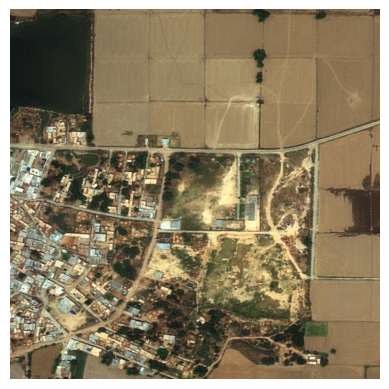

In [1]:

from PIL import Image
import matplotlib.pyplot as plt

img_path = 'samples/deep_globe.jpg'

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [2]:
import requests
from IPython.display import JSON
import json

url = f'http://localhost:8000/EuroSAT-RGB-Q2'
# url = f'https://hub.api.eotdl.com/services/eoxhub-gateway/eotdl/ml-inference/EuroSAT-RGB-Q2'

eotdl_token = '67ee3a898940e45fe4602328'
headers={'Authorization': f'Token {eotdl_token}'}

res = requests.get(url, headers=headers)

# with open('metadata.json', 'w') as f:
#     json.dump(json.loads(res.json()), f, indent=2)

# !cat metadata.json

res.status_code

200

In [3]:
res.json()

[{'type': 'Feature',
  'stac_version': '1.0.0',
  'stac_extensions': ['https://crim-ca.github.io/mlm-extension/v1.2.0/schema.json'],
  'id': 'model.onnx',
  'bbox': [0.0, 0.0, 0.0, 0.0],
  'geometry': {'type': 'Polygon', 'coordinates': []},
  'assets': {'asset': {'checksum': '8ea24e7dec1898c44a115a3b991cb63271c5bfb3',
    'href': 'https://api.eotdl.com/models/66718849ca9a032893ca7d43/stage/model.onnx',
    'size': 44718018,
    'timestamp': '2024-06-18T15:14:52.011000'}},
  'links': [],
  'properties': {'repository': 'eotdl',
   'mlm:name': 'model.onnx',
   'mlm:framework': 'ONNX',
   'mlm:architecture': 'Resnet',
   'mlm:tasks': ['classification'],
   'mlm:input': {'bands': ['red', 'green', 'blue'],
    'input': {'data_type': 'float32',
     'description': 'Model trained with 64x64 RGB Sentinel-2 images, but can work with other dimensions',
     'dim_order': ['batch', 'channel', 'height', 'width'],
     'shape': [-1, 3, -1, -1]},
    'name': 'RGB statellite image (HR)'},
   'mlm:outpu

In [4]:
res = requests.post(url,  files={'image': (open(img_path, 'rb'))})

if res.status_code != 200:
	print(res.json())
res.status_code

KeyboardInterrupt: 

In [5]:
res.json()

{'model': 'EuroSAT-RGB-Q2',
 'output': [[-4.622355937957764,
   -4.991613388061523,
   2.575819969177246,
   -2.175894021987915,
   -2.930996894836426,
   -6.411459922790527,
   -3.3157029151916504,
   -7.315113067626953,
   -3.952169895172119,
   -5.886984825134277]]}